## Observable Trends


Honolulu, Hawaii had up to 7 inches of rain in last twelve months. Months with more than 3 inches of rain include: September, October, February, April, and July.
The most active station indicates the lowest temperature (54.0°F), highest temperature (85.0°F), and average (71.7°F) of the last twelve months.
The aggregate weather data helps us find the daily normals for the trip dates (07-01-2017 to 07-14-2017). The visualization labeled 'Aggregate Daily Normals for Trip Dates' shows the temperature extremes for the trip (low 60°F and high 88°F) while the average predicted temperatures stay in the mid 70's.

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc



#Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
print(Base)
# reflect the tables
Base.prepare(engine, reflect=True)

<class 'sqlalchemy.ext.automap.Base'>


In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()



['measurement', 'station']

In [9]:

# Use `engine.execute` to select and display the first 10 rows from the table

engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
#see the columns of measurement
measurement_columns = inspector.get_columns("measurement")

for c in measurement_columns:
    print(c['name'], c['type'])



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
station_columns = inspector.get_columns("station")
for c in station_columns:
    print(c['name'],c['type'])
        

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

## Precipitation Analysis

In [14]:
#Get the last date of entry

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(last_date)

#extract the date from tuple
last_date, = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(last_date)

('2017-08-23',)
2017-08-23


In [15]:

# Calculate the date 1 year ago from the last data point in the database

#Get the date 365 days from the last date to print data for last 365 days

last_year = dt.date(2017, 8, 23)-dt.timedelta(days=365)
print(last_year)


# Design a query to retrieve the last 12 months of precipitation data 

rain = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date>last_year).\
                order_by(Measurement.date).all()
                

print(rain)


2016-08-23
[('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.05), ('2016-08-31

In [33]:


# Save the query results as a Pandas DataFrame and set the index to the date column

rain_df1 = pd.DataFrame(rain)
rain_df1.head()


# Use Pandas Plotting with Matplotlib to plot the data

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [34]:



# reset the index to the date

rain_df1.set_index("date").head()
#max_entry = rain_df['prcp'].max()




,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


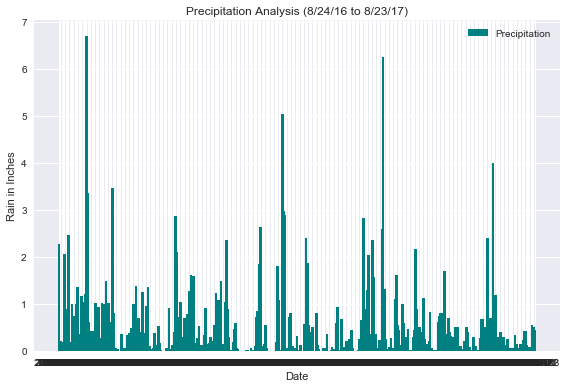

In [35]:

# Use Pandas Plotting with Matplotlib to plot the data
plt.style.use("seaborn")


plt.bar(rain_df1["date"],rain_df1["prcp"], width=2, color="teal")
plt.rcParams["figure.figsize"] = [12,6]
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.legend(["Precipitation"])
#plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("Data Analysis/Precipitation Analysis.png")
plt.show()

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data

rain_df1.describe()



,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


##  STATION ANALYSIS

In [20]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(station_count))

#or
#stat_query = engine.execute('SELECT COUNT(station) FROM station').fetchall()
#station_count = stat_query[0][0]



There are 9 stations.


In [37]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_active = session.query(Measurement.station, func.count(Measurement.tobs)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.tobs).desc()).all()

#print(station_active)

busiest_station = station_active[0][0]
print("The busiest station is: ", busiest_station, "with", station_active[0][1],"observations.")


# List the stations and the counts in descending order.

print("Stations with the highest number of observations in descending order are:")
print()
for station, count in station_active:
  print("Station:",station, "had",count, "observations.")
    
    


The busiest station is:  USC00519281 with 2772 observations.
Stations with the highest number of observations in descending order are:

Station: USC00519281 had 2772 observations.
Station: USC00519397 had 2724 observations.
Station: USC00513117 had 2709 observations.
Station: USC00519523 had 2669 observations.
Station: USC00516128 had 2612 observations.
Station: USC00514830 had 2202 observations.
Station: USC00511918 had 1979 observations.
Station: USC00517948 had 1372 observations.
Station: USC00518838 had 511 observations.


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temperature = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == busiest_station).all()
             
#temperature

print(f"Most Active Station Temperatures")
print(f"Low: {temperature[0][0]} High: {temperature[0][1]} Average: {round(temperature[0][2], 1)}")



Most Active Station Temperatures
Low: 54.0 High: 85.0 Average: 71.7


USC00519397


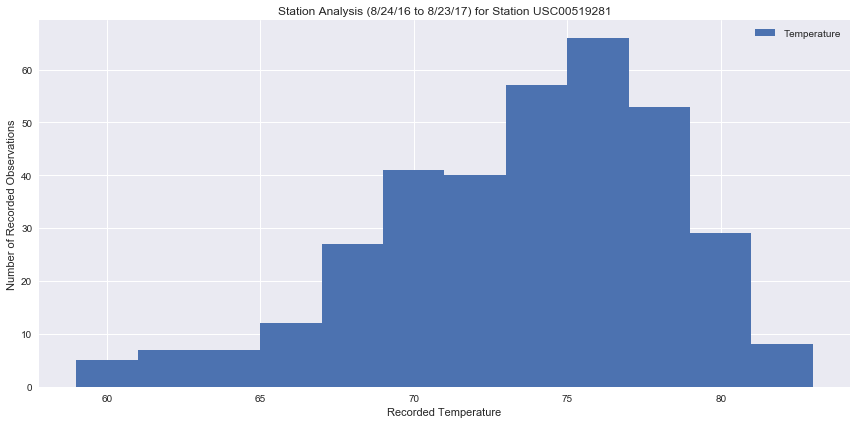

In [23]:
# Choose the station with the highest number of temperature observations.

most_temp_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
                    group_by(Measurement.tobs).\
                    order_by(func.count(Measurement.station).desc()).first()
highest_temp_station = most_temp_station[0]
print(highest_temp_station)

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


temp_observations = session.query(Measurement.tobs).\
                    filter(Measurement.date >= last_year).\
                    filter(Measurement.station == busiest_station).all()

#temp_observations
temp_observations = pd.DataFrame(temp_observations, columns = ["Temperature"])

 #We need 12 bins since the observation is for twelve months

temp_observations.plot.hist(bins=12)
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + busiest_station)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.tight_layout()
plt.savefig("Data Analysis/Temperature Observations of the busiest station.png")
plt.show()

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_arrive = dt.date(2018,4,1)
trip_leave = dt.date(2018,4,15)
last_yeardate = dt.timedelta(days=365)

temp_avg_lst_year = (calc_temps((trip_arrive-last_yeardate), (trip_leave-last_yeardate)))
print(temp_avg_lst_year)


[(67.0, 74.47368421052632, 82.0)]


In [48]:
#PUT IT in a dataframe

trip_temp_df = pd.DataFrame(temp_avg_lst_year, columns=['tmin', 'tavg', 'tmax'])




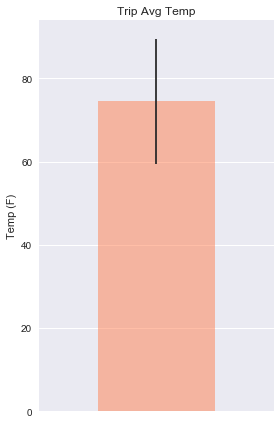

In [49]:

trip_temp_df.plot.bar(y='tavg', yerr=(trip_temp_df['tmax'] - trip_temp_df['tmin']), title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
plt.savefig("Data Analysis/TripAvgTemp.png")
plt.show()

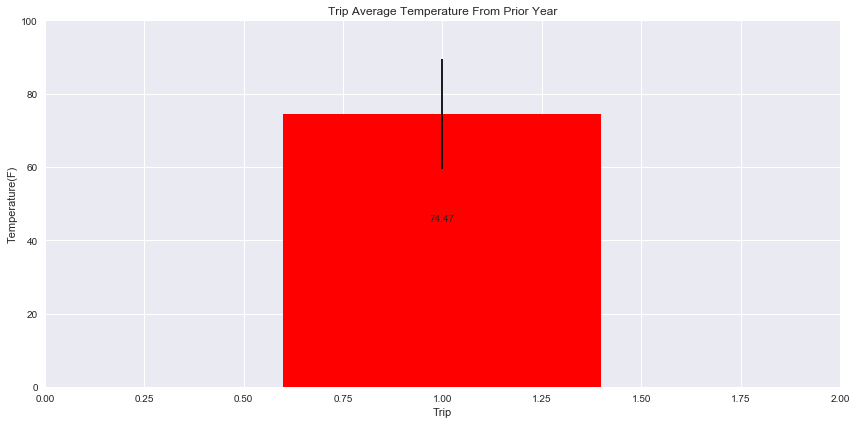

In [52]:
# Plot the results from your previous query as a box plot


p2p = temp_avg_lst_year[0][2]-temp_avg_lst_year[0][0]
avgtemp = temp_avg_lst_year[0][1]
min_temp = temp_avg_lst_year[0][0]
max_temp = temp_avg_lst_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, color= 'red', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature(F)")
ax.set_title("Trip Average Temperature From Prior Year")


def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
    # label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()


plt.show()


In [58]:

# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def precipitation(start_date, end_date):
    
        # Docstring for the function `calc_temps`
    """Precipitation information per weather station
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        A list of tuples containing precipitation amount, station, name, latitude, longitude, and elevation in descending order.
    """
    
    sel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           Measurement.prcp]
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()

print(precipitation('2017-04-01','2017-04-15'))

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.21), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.2), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [61]:
# calculate the daily normals for your trip


# Set the start and end date of the trip
start_date = '2017-07-01'
end_date ='2017-07-14'
# Use the start and end date to create a range of dates

dates = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
        group_by(Measurement.date).all()

#print(dates)


#trip_dates = []
#for i in dates:
  #  trip_dates= i[0]
    
#Extract the dates from the list of tuples

trip_dates = [x[0] for x in dates]
print(trip_dates)


    

# push each tuple of calculations into a list called `normals`

['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08', '2017-07-09', '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13', '2017-07-14']


In [62]:
# Stip off the year and save a list of %m-%d strings

trip_dates_stripped= [x[5:] for x in trip_dates]

start_month_day = trip_dates_stripped[0]
end_month_day = trip_dates_stripped[-1]

print(trip_dates_stripped)

['07-01', '07-02', '07-03', '07-04', '07-05', '07-06', '07-07', '07-08', '07-09', '07-10', '07-11', '07-12', '07-13', '07-14']


In [66]:

# Loop through the list of %m-%d strings and calculate the normals for each date
            
daily_normals = [session.query(func.min(Measurement.tobs),
                       func.avg(Measurement.tobs),
                       func.max(Measurement.tobs)).filter(func.strftime("%m-%d", Measurement.date) >= start_month_day).filter(func.strftime("%m-%d", Measurement.date) <= end_month_day).group_by(func.strftime("%m-%d", Measurement.date)).all()]

daily_normals = daily_normals[0]
print("Aggregate Daily Normals for 07-01 to 07-14")
daily_normals

Aggregate Daily Normals for 07-01 to 07-14


[(67.0, 74.77777777777777, 81.0),
 (68.0, 75.40384615384616, 82.0),
 (68.0, 75.32075471698113, 87.0),
 (70.0, 76.57142857142857, 81.0),
 (66.0, 75.0, 81.0),
 (69.0, 75.0, 81.0),
 (69.0, 74.91071428571429, 82.0),
 (69.0, 76.08333333333333, 83.0),
 (68.0, 76.19298245614036, 83.0),
 (68.0, 75.62068965517241, 82.0),
 (70.0, 75.78947368421052, 81.0),
 (67.0, 75.96491228070175, 82.0),
 (69.0, 76.1896551724138, 81.0),
 (61.0, 76.2280701754386, 82.0)]

In [68]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

daily_normals_df = pd.DataFrame(daily_normals,columns=["tmin", "tavg", "tmax"])

# Add trip_dates to Pandas DataFrame
daily_normals_df['date']= trip_dates

# Change datatype from element to datetime object on Pandas, makes x axis title to add 
daily_normals_df['date'] = pd.to_datetime(daily_normals_df['date'], format='%Y-%m-%d')

# Set index to date
daily_normals_df.set_index('date',inplace=True)

daily_normals_df


,tmin,tavg,tmax
date,,,
2017-07-01,67.0,74.777778,81.0
2017-07-02,68.0,75.403846,82.0
2017-07-03,68.0,75.320755,87.0
2017-07-04,70.0,76.571429,81.0
2017-07-05,66.0,75.000000,81.0
2017-07-06,69.0,75.000000,81.0
2017-07-07,69.0,74.910714,82.0
2017-07-08,69.0,76.083333,83.0
2017-07-09,68.0,76.192982,83.0


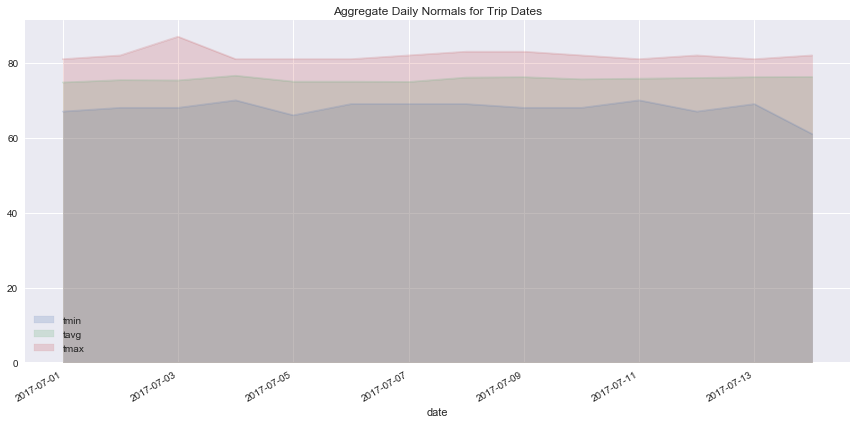

In [69]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(kind='area', alpha=.2, stacked=False, x_compat=True, title="Aggregate Daily Normals for Trip Dates")
plt.tight_layout()
plt.savefig("Data Analysis/DailyNormals.png")
plt.show()
